# Rofous Dev
This file is where you can test and develop functionalities for the rofous project

In [1]:
import numpy as np
import Aerial_Device
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### PID example

[ 0.         0.        -0.3374719  0.         0.        -0.3118231]


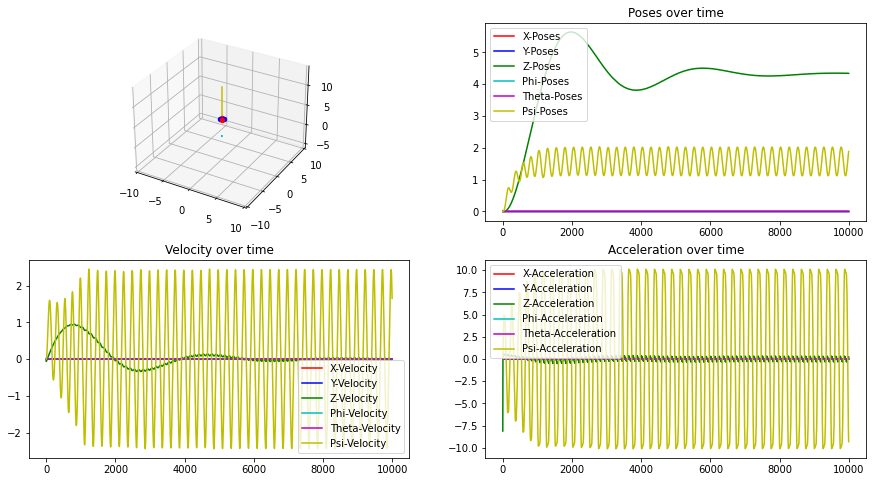

In [125]:
rofous = Aerial_Device.Aerial_Device(memory_length=10000)
artist = Aerial_Device.Renderer(rofous)
rofous.reset()
target = (0,0,4,0,0,np.radians(90))
rofous.control.gains = [0.5, 0.9, 0.1]

for i in range(10000):
    rofous.adjust_throttles(target=target)
    rofous.update_odometry()
    if np.abs(np.sum(rofous.id.path['poses'][-5:])) < 1e-6:
        break
        
print(target - rofous.poseActual)   
artist.render()

In [79]:
def step(rofous, target):
    rofous.reset()
    p_ctr = 0
    peak = 0
    max_o = 0
    for j in range(10000):
        rofous.adjust_throttles(target=target)
        rofous.update_odometry()

        # if velocity changes sign the pose is beginning an oscillation
        if np.sign(np.sum(rofous.id.path['velocities'][-1])) != np.sign(np.sum(rofous.id.path['velocities'][-2])):
            if np.linalg.norm(rofous.poseActual - target) > max_o and j != 0:
                max_o = np.linalg.norm(rofous.poseActual - target)
                peak = j
            p_ctr += 1
        if np.abs(np.sum(rofous.id.path['poses'][-5:])) < 1e-3:
            break
    return p_ctr * 100 / (max_o + peak + 1e-5)

0.04997346969700083 1e-05
0.049973472811089784 1e-05
0.04997347592467401 1e-05
0.04997347903775345 1e-05
0.049973482150328034 1e-05
0.04997348526239775 1e-05
0.04997348837396246 1e-05
0.049973491485022184 1e-05
0.04997349459557679 1e-05
0.049973497705626355 1e-05
[0.500005 0.       0.      ]


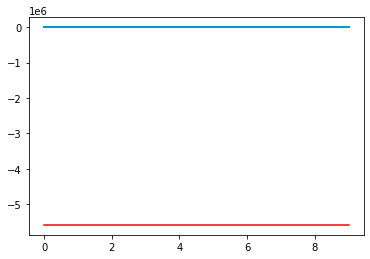

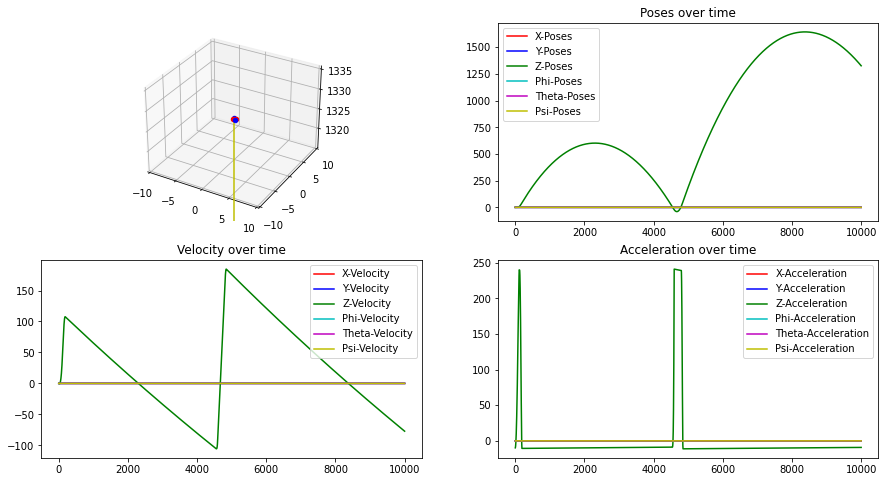

In [86]:
rofous = Aerial_Device.Aerial_Device(memory_length=10000)
artist = Aerial_Device.Renderer(rofous)
target = [0,0,10,0,0,0]

sp = [np.linalg.norm(target)]
pv = []
op = []
a = 1e-5
scores = []
rofous.control.gains = np.array([0.5, 0, 0])
gains = []

for i in range(10):
    score = step(rofous, target)
    scores.append(score)
    gains.append(rofous.control.gains)
    d_gain = [score*a, max_o*peak*a, peak*a/5]
    print(score, d_gain)
    rofous.control.gains += np.array(d_gain)
        
print(rofous.control.gains)  
gains = np.array(gains)
x = np.arange(0,len(scores))
"""
plt.plot(x, ((pv-np.mean(pv)) / np.std(pv)) + sp[0], 'r', label='Effect')
plt.plot(x, ((op-np.mean(op)) / np.std(op)) + sp[0], 'g', label='Control')
plt.plot(x, sp*len(pv), 'b', label='Target')
plt.legend()
plt.show()"""

plt.plot(x, gains[:,0], 'g')
plt.plot(x, gains[:,1], 'b')
plt.plot(x, gains[:,2], 'c')
plt.plot(x, scores-np.mean(scores)/np.std(scores), 'r')
plt.show()
   
artist.render()